### Epsilon-Greedy Algorithm

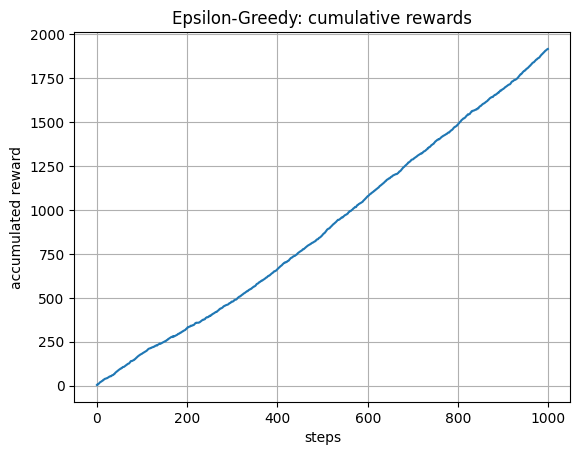

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedy:
    def __init__(self, k_arm=10, epsilon=0.1, steps=1000):
        self.k = k_arm
        self.epsilon = epsilon
        self.steps = steps
        self.q_true = np.random.normal(0, 1, k_arm)
        self.q_est = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.rewards = []

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        return np.argmax(self.q_est)

    def run(self):
        for _ in range(self.steps):
            action = self.select_action()
            reward = np.random.normal(self.q_true[action], 1)
            self.action_count[action] += 1
            self.q_est[action] += (reward - self.q_est[action]) / self.action_count[action]
            self.rewards.append(reward)
        return self.rewards

# 執行與繪圖
np.random.seed(0)
agent = EpsilonGreedy(epsilon=0.1)
rewards = agent.run()
cumulative_rewards = np.cumsum(rewards)

plt.plot(cumulative_rewards)
plt.title("Epsilon-Greedy: cumulative rewards")
plt.xlabel("steps")
plt.ylabel("accumulated reward")
plt.grid()
plt.show()

### UCB (Upper Confidence Bound) Algorithm

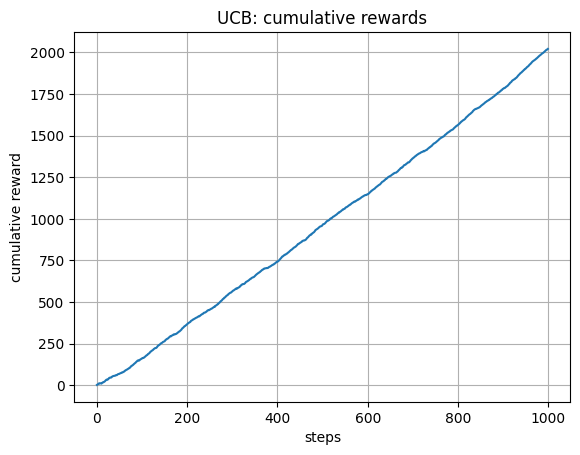

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class UCB:
    def __init__(self, k_arm=10, c=2, steps=1000):
        self.k = k_arm
        self.c = c
        self.steps = steps
        self.q_true = np.random.normal(0, 1, k_arm)
        self.q_est = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.rewards = []

    def select_action(self, t):
        ucb_values = self.q_est + self.c * np.sqrt(np.log(t + 1) / (self.action_count + 1e-5))
        return np.argmax(ucb_values)

    def run(self):
        for t in range(self.steps):
            action = self.select_action(t)
            reward = np.random.normal(self.q_true[action], 1)
            self.action_count[action] += 1
            self.q_est[action] += (reward - self.q_est[action]) / self.action_count[action]
            self.rewards.append(reward)
        return self.rewards

# 執行與繪圖
np.random.seed(0)
agent = UCB(c=2)
rewards = agent.run()
cumulative_rewards = np.cumsum(rewards)

plt.plot(cumulative_rewards)
plt.title("UCB: cumulative rewards")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.grid()
plt.show()

### Softmax Algorithm

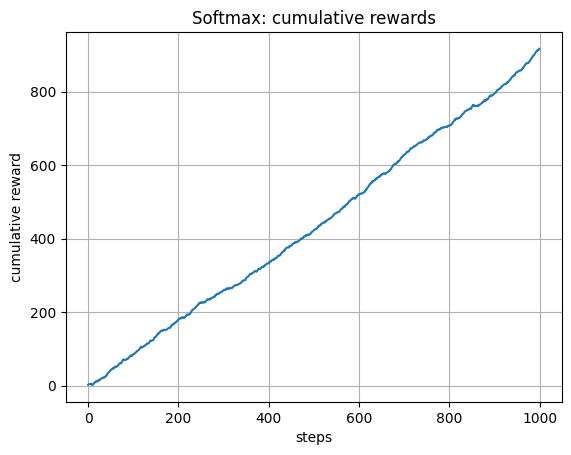

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Softmax:
    def __init__(self, k_arm=10, tau=0.1, steps=1000):
        self.k = k_arm
        self.tau = tau
        self.steps = steps
        self.q_true = np.random.normal(0, 1, k_arm)
        self.q_est = np.zeros(k_arm)
        self.action_count = np.zeros(k_arm)
        self.rewards = []

    def softmax_prob(self):
        exp_est = np.exp(self.q_est / self.tau)
        return exp_est / np.sum(exp_est)

    def select_action(self):
        probs = self.softmax_prob()
        return np.random.choice(self.k, p=probs)

    def run(self):
        for _ in range(self.steps):
            action = self.select_action()
            reward = np.random.normal(self.q_true[action], 1)
            self.action_count[action] += 1
            self.q_est[action] += (reward - self.q_est[action]) / self.action_count[action]
            self.rewards.append(reward)
        return self.rewards

# 執行與繪圖
np.random.seed(0)
agent = Softmax(tau=0.1)
rewards = agent.run()
cumulative_rewards = np.cumsum(rewards)

plt.plot(cumulative_rewards)
plt.title("Softmax: cumulative rewards")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.grid()
plt.show()

### Thompson Sampling Algorithm

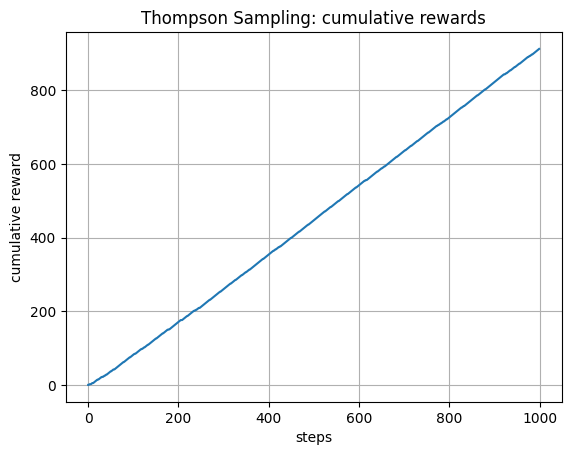

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class ThompsonSampling:
    def __init__(self, k_arm=10, steps=1000):
        self.k = k_arm
        self.steps = steps
        self.q_true = np.random.beta(2, 2, k_arm)  # 真實機率（0~1）
        self.alpha = np.ones(k_arm)
        self.beta = np.ones(k_arm)
        self.rewards = []

    def select_action(self):
        theta = np.random.beta(self.alpha, self.beta)
        return np.argmax(theta)

    def run(self):
        for _ in range(self.steps):
            action = self.select_action()
            reward = np.random.binomial(1, self.q_true[action])  # 獎勵為 0 或 1
            self.alpha[action] += reward
            self.beta[action] += 1 - reward
            self.rewards.append(reward)
        return self.rewards

# 執行與繪圖
np.random.seed(0)
agent = ThompsonSampling()
rewards = agent.run()
cumulative_rewards = np.cumsum(rewards)

plt.plot(cumulative_rewards)
plt.title("Thompson Sampling: cumulative rewards")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.grid()
plt.show()